In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('pre_processed_dataset.csv')
df.head(3)

,time,month,day,quantity_sold_kg,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_amaranth,item_name_basil,...,item_name_yuxingcao,item_name_zhijiang red bolt,item_name_zhimaxiancai,item_name_zhuyecai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
0,9,1,10,0.4265,19.8,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,9,1,19,0.3170,18.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,9,1,20,0.3390,18.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [56]:
from sklearn.model_selection import train_test_split
# import tensorflow as tf

In [57]:
# define dependent and non dependent variables
y = df['quantity_sold_kg']
x = df.drop(columns=['quantity_sold_kg'], axis=1)

# split the dataset 0.8, 0.1, 0.1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape

((19619, 133), (4905, 133))

In [58]:
df_test = pd.concat([y_test.reset_index(drop=True), x_test.reset_index(drop=True)], axis=1)
df_test.to_csv('testing_dataset.csv')
df_test.sample(3)

,quantity_sold_kg,time,month,day,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_amaranth,item_name_basil,...,item_name_yuxingcao,item_name_zhijiang red bolt,item_name_zhimaxiancai,item_name_zhuyecai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
1898,1.000000,21,12,9,3.9,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4016,0.374667,11,5,18,2.6,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
792,0.412000,9,6,27,10.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [59]:
import xgboost as xg 

In [60]:
xgmodel = xg.XGBRegressor()
xgmodel.fit(x_train, y_train)
pred = xgmodel.predict(x_test)

In [61]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

In [62]:
print('MAE: ', mean_absolute_error(y_test, pred))
print('RMSE: ', root_mean_squared_error(y_test, pred))

MAE:  0.06489553766176252
RMSE:  0.11537045208942544


In [63]:
from sklearn.tree import DecisionTreeRegressor 

In [64]:
dtmodel = DecisionTreeRegressor()
dtmodel.fit(x_train, y_train)
pred = dtmodel.predict(x_test)

In [65]:
# Testing set
test_pred = dtmodel.predict(x_test)
test_error = mean_absolute_error(y_test, test_pred)

print('MAE: ', mean_absolute_error(y_test, pred))
print('RMSE: ', root_mean_squared_error(y_test, pred))

MAE:  0.08616142084441777
RMSE:  0.16578458104066085


In [66]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

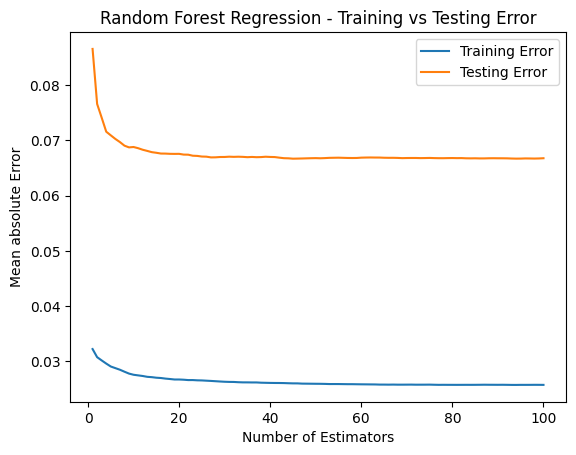

In [67]:
train_errors = []
test_errors = []

for i in range(1, 101):
    model = RandomForestRegressor(n_estimators=i, random_state=42)
    model.fit(x_train, y_train)
    
    # Training set
    train_pred = model.predict(x_train)
    train_error = mean_absolute_error(y_train, train_pred)
    train_errors.append(train_error)

    # Testing set
    test_pred = model.predict(x_test)
    test_error = mean_absolute_error(y_test, test_pred)
    test_errors.append(test_error)

# Plotting the results
plt.plot(range(1, 101), train_errors, label='Training Error')
plt.plot(range(1, 101), test_errors, label='Testing Error')
plt.title('Random Forest Regression - Training vs Testing Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean absolute Error')
plt.legend(loc='upper right')

In [68]:
pred = xgmodel.predict(x_test)
pred[:5]

array([0.40455797, 1.003495  , 0.2249799 , 1.0029448 , 0.6210676 ],
      dtype=float32)

In [69]:
y_test.head(5)

14443    0.3222
24319    1.0000
12678    0.2040
24423    1.0000
19977    0.4930
Name: quantity_sold_kg, dtype: float64

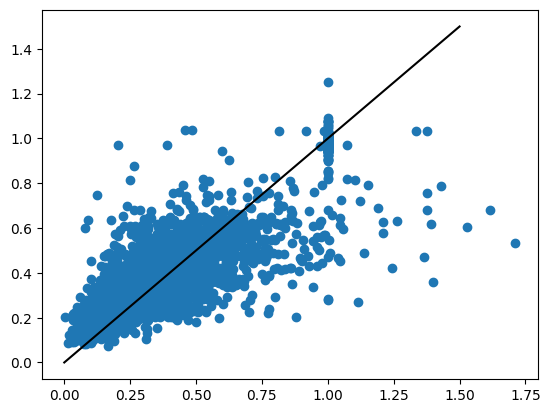

In [70]:
x = [0 , 1.5]
y = x

plt.scatter(y_test, pred)
plt.plot(x, y, color='black')

In [71]:
# save the model
import pickle
with open('Xgboost.pickle', 'wb') as file:
    pickle.dump(xgmodel, file)